In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import log, dot, e
from numpy.random import rand, randint
from sklearn.model_selection import train_test_split

### task 1. linear regression

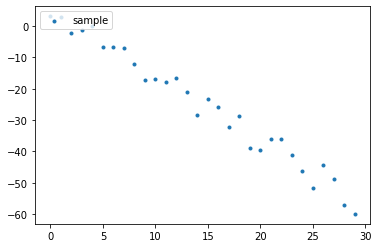

In [3]:
#sample initialization
#params
a_true, b_true = -2, 3
#sample size
size = 30

x = np.arange(size)
y = a_true * x + b_true + np.random.uniform(-5, 5, size)

plt.scatter(x,y, marker = '.', label='sample')
plt.legend(loc='upper left')
plt.show()

In [4]:
class LineasRegression():
    
    def cost_function(self, x, a, b):                 
        cost = (1/(2*len(x)))*sum((x*a+b - y)**2)
        return cost
    
    def cost_dev(self, a,b, x, y):
        dev_a = (1/len(x))*sum(x*(x*a+b - y))
        dev_b = (1/len(x))*sum(x*a+b - y)
        return (dev_a, dev_b)
    
    
    def fit(self, x, y, epochs=50, lr=0.05):        
        loss = []
        a, b = 0, 1
        for _ in range(epochs): 
            # Gradient Descent
            a, b = map(lambda x,y : x-lr*y, (a,b), self.cost_dev(a, b, x, y))       
            loss.append(self.cost_function(x, a, b)) 
            
        self.weights = a, b
        self.loss = loss
        
    
    def predict(self, X):        
        return self.weights[0]*X+self.weights[1]
    

In [5]:
model = LineasRegression()
model.fit(x, y, epochs=1000, lr=0.002)
a, b = model.weights

print(f'found a: {a},\nfound b: {b}\n')
print(f'deviation a: {abs(a - a_true)},\ndeviation b: {abs(b - b_true)}')

found a: -1.9619873803552235,
found b: 2.553902402591504

deviation a: 0.038012619644776535,
deviation b: 0.44609759740849597


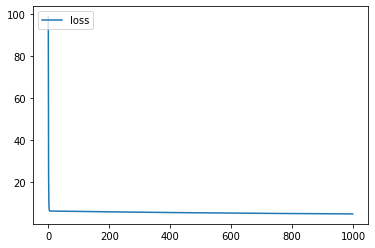

In [6]:
plt.plot(range(len(model.loss)), model.loss, label='loss')
plt.legend(loc='upper left')
plt.show()

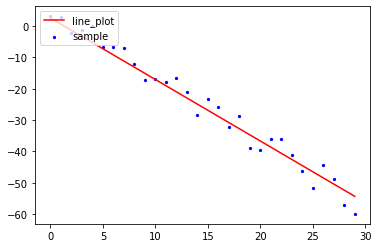

In [7]:
plt.scatter(x, y, s=20, c='b', marker = '.', label='sample')
plt.plot(range(size),a*x+b, c='r', label='line_plot')
plt.legend(loc='upper left')
plt.show()

### task 2. logistic regression

In [8]:
class LogisticRegression:
    
    def sigmoid(self, z): return 1 / (1 + e**(-z))
    
    
    def cost_function(self, X, y, weights):                 
        z = dot(X, weights)
        predict_1 = y * log(self.sigmoid(z))
        predict_0 = (1 - y) * log(1 - self.sigmoid(z))
        return -sum(predict_1 + predict_0) / len(X)
    
    
    def fit(self, X, y, epochs=25, lr=0.05):        
        loss = []
        weights = rand(X.shape[1])
        N = len(X)
                 
        for _ in range(epochs):        
            # Gradient Descent
            y_ = self.sigmoid(dot(X, weights))
            weights -= lr * dot(X.T,  y_ - y) / N            
            loss.append(self.cost_function(X, y, weights)) 
            
        self.weights = weights
        self.loss = loss
    
    def predict(self, X):        
        z = dot(X, self.weights)
        return [1 if i > 0.5 else 0 for i in self.sigmoid(z)]
    
    

def accuracy(preds, y_test):
    return (len(preds) - sum(abs(preds - y_test)))/len(preds)

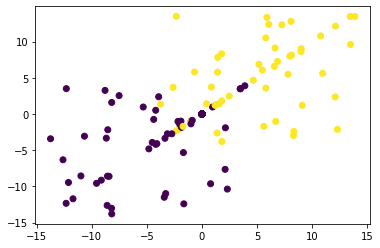

In [14]:
#generate dataset
size = 200
dataset = np.zeros(shape = (size, 3))
sigma = np.random.uniform(-9, 9, size)

for i in range(0,int(size/2), 2):
    dataset[i] = -5+sigma[i], -5+sigma[i+np.random.randint(0,3)], 0
    dataset[i+1] = 5+sigma[i], 5+sigma[i+np.random.randint(0,3)], 1

plt.scatter(dataset[:,0], dataset[:,1], c=dataset[:,2])
plt.show()

In [15]:
#spkit dataset for train/test
sample = dataset[:, :-1]
lable = dataset[:, -1]
X_train, X_test, Y_train, Y_test = train_test_split(sample, lable, test_size = 0.3, random_state = 42)

In [16]:
#trainig mmodel
model = LogisticRegression()
model.fit(X_train, Y_train)
preds = model.predict(X_test)

In [17]:
print(f'model accuracy:  {accuracy(preds, Y_test)}')

model accuracy:  0.95
